# Load packages

In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

# data

## Accuracy

In [2]:
!pwd
!ls

/Users/ricky/Desktop/sp23-ancient-artifacts-team8/3_ml
accuracy_feature_importance.ipynb multi-class classification.ipynb
archive                           output
binary_classification             plot_tree


In [36]:
soil_0125 = pd.read_csv("output/accuracy/accuracy_0125mm_under.csv").iloc[: , 1:]
soil_025 = pd.read_csv("output/accuracy/accuracy_025mm_under.csv").iloc[: , 1:]
soil_05 = pd.read_csv("output/accuracy/accuracy_05mm_under.csv").iloc[: , 1:]
soil_1_under = pd.read_csv("output/accuracy/accuracy_1mm_under.csv").iloc[: , 1:]
soil_1_over = pd.read_csv("output/accuracy/accuracy_1mm_over.csv").iloc[: , 1:]
soil_2_4_over = pd.read_csv("output/accuracy/accuracy_2_4mm_over.csv").iloc[: , 1:]
soil_2_4_smotetomek = pd.read_csv("output/accuracy/accuracy_2_4mm_smotetomek.csv").iloc[: , 1:]
soil_soil = pd.read_csv("output/accuracy/accuracy_archaeologicalSoil_under.csv").iloc[: , 1:]
soil_experiment_9 = pd.read_csv("output/accuracy/accuracy_all_experiment9_under.csv").iloc[: , 1:]
soil_all = pd.read_csv("output/accuracy/accuracy_all_under.csv").iloc[: , 1:]

In [37]:
soil_0125 = soil_0125.assign(size_micro = '0.125mm')
soil_025 = soil_025.assign(size_micro = '0.25mm')
soil_05 = soil_05.assign(size_micro = '0.5mm')
soil_1_under = soil_1_under.assign(size_micro = '1mm under')
soil_1_over = soil_1_over.assign(size_micro = '1mm over')
soil_2_4_over = soil_2_4_over.assign(size_micro = '2-4mm over')
soil_2_4_smotetomek = soil_2_4_smotetomek.assign(size_micro = '2-4mm smotetomek')
soil_soil = soil_soil.assign(size_micro = 'Archaeological soil')
soil_experiment_9 = soil_experiment_9.assign(size_micro = 'experiment 9')
soil_all = soil_all.assign(size_micro = 'all')

In [38]:
# Concatenate the data sets along the rows
accuracy_data = pd.concat([soil_0125,soil_025,soil_05,
                        soil_1_under,soil_1_over,soil_2_4_over,soil_2_4_smotetomek,
                        soil_soil,soil_experiment_9,soil_all], axis=0)

In [39]:
accuracy_data.head(7)

,model,train_accuracy,test_accuracy,train_accuracy_CV,test_accuracy_CV,size_micro
0,LightGBM,1.000000,0.998585,1.000000,0.997170,0.125mm
1,AdaBoost,0.997759,0.996698,1.000000,0.997642,0.125mm
2,Random Forest,1.000000,0.993396,0.987733,1.000000,0.125mm
3,Bagging,0.979122,0.975000,0.980184,0.977830,0.125mm
4,Extra Trees,1.000000,0.991038,0.985138,0.991038,0.125mm
5,SVC,0.985492,0.988679,0.983841,0.994811,0.125mm
0,LightGBM,1.000000,0.993868,1.000000,0.996226,0.25mm


### Random forest

In [52]:
# Concatenate the data sets along the rows
accuracy_data = pd.concat([soil_0125,soil_025,soil_05,
                        soil_1_under,soil_1_over,soil_2_4_over,soil_2_4_smotetomek,
                        soil_soil,soil_experiment_9,soil_all], axis=0)

In [53]:
accuracy_data = accuracy_data[accuracy_data['model'] == 'Random Forest']

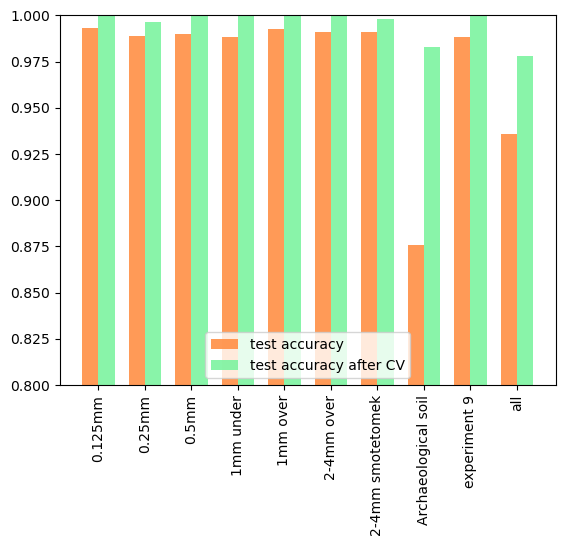

In [54]:
bar_width = 0.35

models = np.arange(len(accuracy_data['size_micro']))

plt.bar(models - bar_width/2, accuracy_data['test_accuracy'], bar_width, 
        color='#FF8F45', label='test accuracy', alpha=0.9)
plt.bar(models + bar_width/2, accuracy_data['test_accuracy_CV'], bar_width, 
        color='#7CF3A0', label='test accuracy after CV', alpha=0.9)

# for i, v in enumerate(df['test_accuracy']):
#     plt.text(i - bar_width/2, v + 0.01, format(v, '.4f'), ha='center', va='bottom')

# for i, v in enumerate(df['test_accuracy_CV']):
#     plt.text(i + bar_width/2, v + 0.01, format(v, '.4f'), ha='center', va='bottom')

plt.xticks(models, accuracy_data['size_micro'])
plt.xticks(rotation = 90)
plt.ylim(0.8, 1)
plt.legend()
plt.legend(loc='lower center')
plt.show()

### LGBM

In [55]:
# Concatenate the data sets along the rows
accuracy_data = pd.concat([soil_0125,soil_025,soil_05,
                        soil_1_under,soil_1_over,soil_2_4_over,soil_2_4_smotetomek,
                        soil_soil,soil_experiment_9,soil_all], axis=0)

In [56]:
accuracy_data = accuracy_data[accuracy_data['model'] == 'LightGBM']

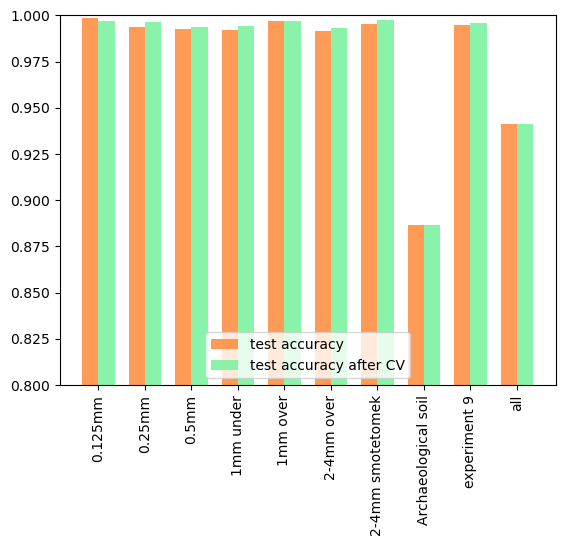

In [57]:
bar_width = 0.35

models = np.arange(len(accuracy_data['size_micro']))

plt.bar(models - bar_width/2, accuracy_data['test_accuracy'], bar_width, 
        color='#FF8F45', label='test accuracy', alpha=0.9)
plt.bar(models + bar_width/2, accuracy_data['test_accuracy_CV'], bar_width, 
        color='#7CF3A0', label='test accuracy after CV', alpha=0.9)

plt.xticks(models, accuracy_data['size_micro'])
plt.xticks(rotation = 90)
plt.ylim(0.8, 1)
plt.legend()
plt.legend(loc='lower center')
plt.show()

### AdaBoost

In [58]:
# Concatenate the data sets along the rows
accuracy_data = pd.concat([soil_0125,soil_025,soil_05,
                        soil_1_under,soil_1_over,soil_2_4_over,soil_2_4_smotetomek,
                        soil_soil,soil_experiment_9,soil_all], axis=0)

In [59]:
accuracy_data = accuracy_data[accuracy_data['model'] == 'AdaBoost']

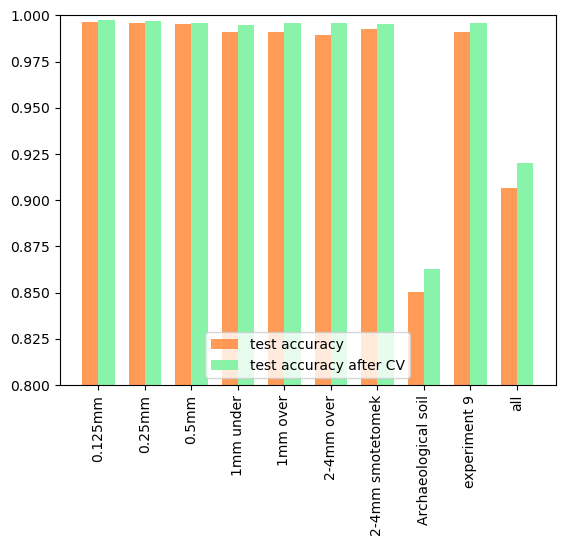

In [60]:
bar_width = 0.35

models = np.arange(len(accuracy_data['size_micro']))

plt.bar(models - bar_width/2, accuracy_data['test_accuracy'], bar_width, 
        color='#FF8F45', label='test accuracy', alpha=0.9)
plt.bar(models + bar_width/2, accuracy_data['test_accuracy_CV'], bar_width, 
        color='#7CF3A0', label='test accuracy after CV', alpha=0.9)

plt.xticks(models, accuracy_data['size_micro'])
plt.xticks(rotation = 90)
plt.ylim(0.8, 1)
plt.legend()
plt.legend(loc='lower center')
plt.show()

### Extra trees

In [61]:
# Concatenate the data sets along the rows
accuracy_data = pd.concat([soil_0125,soil_025,soil_05,
                        soil_1_under,soil_1_over,soil_2_4_over,soil_2_4_smotetomek,
                        soil_soil,soil_experiment_9,soil_all], axis=0)

In [62]:
accuracy_data = accuracy_data[accuracy_data['model'] == 'Extra Trees']

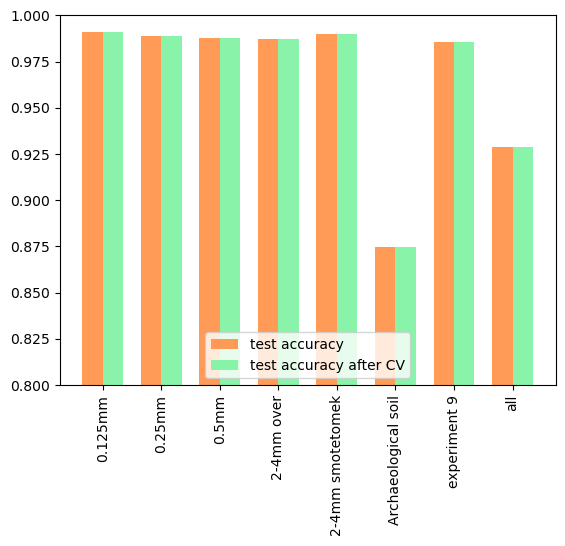

In [63]:
bar_width = 0.35

models = np.arange(len(accuracy_data['size_micro']))

plt.bar(models - bar_width/2, accuracy_data['test_accuracy'], bar_width, 
        color='#FF8F45', label='test accuracy', alpha=0.9)
plt.bar(models + bar_width/2, accuracy_data['test_accuracy_CV'], bar_width, 
        color='#7CF3A0', label='test accuracy after CV', alpha=0.9)

plt.xticks(models, accuracy_data['size_micro'])
plt.xticks(rotation = 90)
plt.ylim(0.8, 1)
plt.legend()
plt.legend(loc='lower center')
plt.show()

### Bagging

In [64]:
# Concatenate the data sets along the rows
accuracy_data = pd.concat([soil_0125,soil_025,soil_05,
                        soil_1_under,soil_1_over,soil_2_4_over,soil_2_4_smotetomek,
                        soil_soil,soil_experiment_9,soil_all], axis=0)

In [65]:
accuracy_data = accuracy_data[accuracy_data['model'] == 'Bagging']

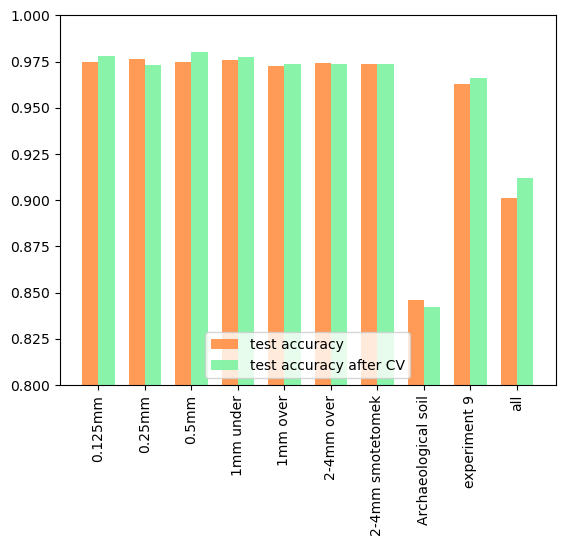

In [66]:
bar_width = 0.35

models = np.arange(len(accuracy_data['size_micro']))

plt.bar(models - bar_width/2, accuracy_data['test_accuracy'], bar_width, 
        color='#FF8F45', label='test accuracy', alpha=0.9)
plt.bar(models + bar_width/2, accuracy_data['test_accuracy_CV'], bar_width, 
        color='#7CF3A0', label='test accuracy after CV', alpha=0.9)

plt.xticks(models, accuracy_data['size_micro'])
plt.xticks(rotation = 90)
plt.ylim(0.8, 1)
plt.legend()
plt.legend(loc='lower center')
plt.show()

### SVC

In [67]:
# Concatenate the data sets along the rows
accuracy_data = pd.concat([soil_0125,soil_025,soil_05,
                        soil_1_under,soil_1_over,soil_2_4_over,soil_2_4_smotetomek,
                        soil_soil,soil_experiment_9,soil_all], axis=0)

In [68]:
accuracy_data = accuracy_data[accuracy_data['model'] == 'SVC']

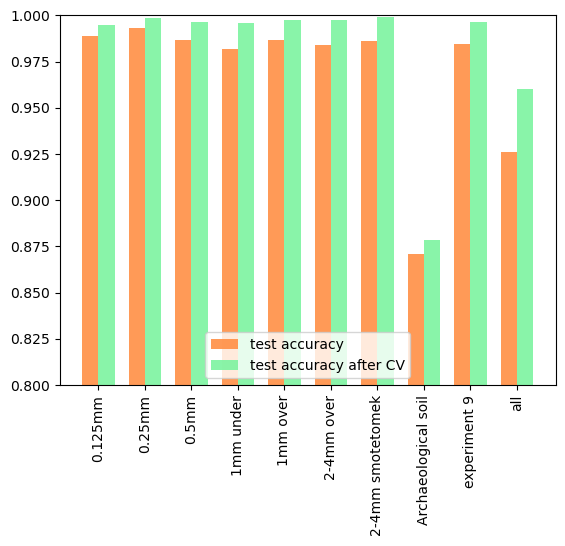

In [69]:
bar_width = 0.35

models = np.arange(len(accuracy_data['size_micro']))

plt.bar(models - bar_width/2, accuracy_data['test_accuracy'], bar_width, 
        color='#FF8F45', label='test accuracy', alpha=0.9)
plt.bar(models + bar_width/2, accuracy_data['test_accuracy_CV'], bar_width, 
        color='#7CF3A0', label='test accuracy after CV', alpha=0.9)

plt.xticks(models, accuracy_data['size_micro'])
plt.xticks(rotation = 90)
plt.ylim(0.8, 1)
plt.legend()
plt.legend(loc='lower center')
plt.show()

## Feature importance

In [19]:
soil_0125 = pd.read_csv("output/feature_importance/fi_0125mm_under.csv").iloc[: , 1:]
soil_025 = pd.read_csv("output/feature_importance/fi_025mm_under.csv").iloc[: , 1:]
soil_05 = pd.read_csv("output/feature_importance/fi_05mm_under.csv").iloc[: , 1:]
soil_1_under = pd.read_csv("output/feature_importance/fi_1mm_under.csv").iloc[: , 1:]
soil_1_over = pd.read_csv("output/feature_importance/fi_1mm_over.csv").iloc[: , 1:]

soil_2_4_over = pd.read_csv("output/feature_importance/fi_2_4mm_over.csv").iloc[: , 1:]
soil_2_4_smotetomek = pd.read_csv("output/feature_importance/fi_2_4mm_smotetomek.csv").iloc[: , 1:]
soil_soil = pd.read_csv("output/feature_importance/fi_ArchaeologicalSoil_under.csv").iloc[: , 1:]
soil_experiment_9 = pd.read_csv("output/feature_importance/fi_all_experiment9_under.csv").iloc[: , 1:]
soil_all = pd.read_csv("output/feature_importance/fi_ArchaeologicalSoil_under.csv").iloc[: , 1:]

In [20]:
soil_0125 = soil_0125.assign(size_micro = '0.125mm')
soil_025 = soil_025.assign(size_micro = '0.25mm')
soil_05 = soil_05.assign(size_micro = '0.5mm')
soil_1_under = soil_1_under.assign(size_micro = '1mm under')
soil_1_over = soil_1_over.assign(size_micro = '1mm over')
soil_2_4_over = soil_2_4_over.assign(size_micro = '2-4mm over')
soil_2_4_smotetomek = soil_2_4_smotetomek.assign(size_micro = '2-4mm smotetomek')
soil_soil = soil_soil.assign(size_micro = 'Archaeological soil')
soil_experiment_9 = soil_experiment_9.assign(size_micro = 'experiment 9')
soil_all = soil_all.assign(size_micro = 'all')

In [21]:
# Concatenate the data sets along the rows
fi_data = pd.concat([soil_0125,soil_025,soil_05,
                        soil_1_under,soil_1_over,soil_2_4_over,soil_2_4_smotetomek,
                        soil_soil,soil_experiment_9,soil_all], axis=0)

In [22]:
fi_data.head()

,feature_name,importance,size_micro
0,Ellipticity,0.100494,0.125mm
1,CHull Surface Area,0.098379,0.125mm
2,Extent,0.087242,0.125mm
3,T/W Ratio,0.072685,0.125mm
4,Sphericity,0.062161,0.125mm


In [23]:
mean_rank = fi_data.groupby('feature_name').mean()
mean_rank.sort_values(by='importance', ascending=False, inplace=True)

In [25]:
mean_rank.head()

,importance
feature_name,
Ellipticity,0.107017
Curvature,0.105750
CHull Surface Area,0.075662
Extent,0.065379
T/W Ratio,0.056359


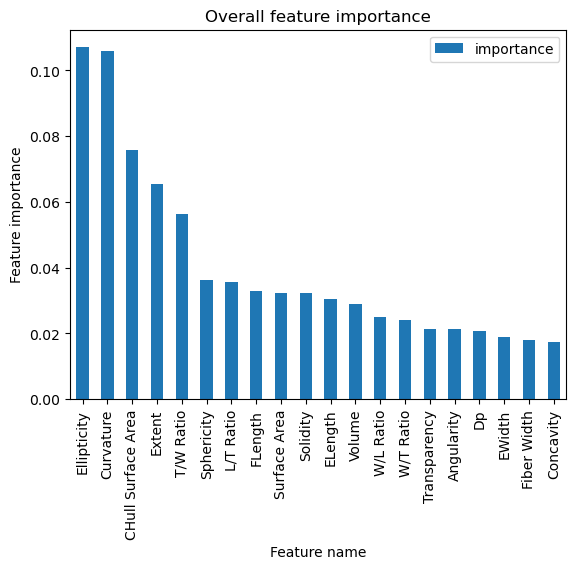

In [27]:
import matplotlib.pyplot as plt

mean_rank.reset_index(inplace=True)
mean_rank.head(20).plot(kind='bar', x='feature_name', y='importance')
plt.xlabel('Feature name')
plt.xticks(rotation = 90)
plt.ylabel('Feature importance')
plt.title('Overall feature importance')
plt.show()